In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Verificare se i clienti con contratto a lungo termine (Contract="Two year") hanno in media una spesa mensile (MonthlyCharges) inferiore rispetto a quelli con contratti mensili o annuali. (punti 2)

In [10]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [11]:
df.groupby('Contract')['MonthlyCharges'].mean()

,MonthlyCharges
Contract,
Month-to-month,66.398490
One year,65.048608
Two year,60.770413


In [12]:
a_lungo_termine = df[df['Contract']=='Two year']

In [14]:
a_breve_termine = df[df['Contract']!='Two year']

In [15]:
a_lungo_termine['MonthlyCharges'].mean()

np.float64(60.77041297935103)

In [16]:
a_breve_termine['MonthlyCharges'].mean()

np.float64(66.02669222139117)

Discretizzare tenure (anzianità del cliente) in 3 gruppi (bassa, media, alta). Creare una tabella pivot che mostri la percentuale di abbandono (Churn) per gruppo di anzianità e tipo di contratto. I clienti con anzianità bassa e contratto mensile hanno una probabilità maggiore di abbandonare? (punti 3)


In [18]:
df['tenure_cut'] = pd.cut(df['tenure'], bins=3, labels=['bassa', 'media', 'alta'])

In [24]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [26]:
pd.pivot_table(df, values='Churn', index='tenure_cut', columns='Contract', aggfunc='mean')

/tmp/ipython-input-3759853518.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, values='Churn', index='tenure_cut', columns='Contract', aggfunc='mean')


Contract,Month-to-month,One year,Two year
tenure_cut,,,
bassa,0.476748,0.090343,0.000000
media,0.329177,0.106178,0.021898
alta,0.260234,0.129338,0.033254


Determinare se l’adozione di almeno un servizio extra (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) riduce il tasso di abbandono. (punti 2) Creare una nuova feature che conta il numero di servizi aggiuntivi attivi per cliente e verificare con un grafico se il tasso di abbandono diminuisce all’aumentare del numero di servizi attivi. (punti 2)


In [34]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [35]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [36]:
for col in cols:
  df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})

In [39]:
df[(df['OnlineSecurity']==1) | (df['OnlineBackup']==1) |
 (df['DeviceProtection']==1) | (df['TechSupport']==1) | (df['StreamingTV']==1) | (df['StreamingMovies']==1)]['Churn'].mean()

np.float64(0.28897180762852404)

In [40]:
df[(df['OnlineSecurity']==0) & (df['OnlineBackup']==0) &
 (df['DeviceProtection']==0) & (df['TechSupport']==0) & (df['StreamingTV']==0) & (df['StreamingMovies']==0)]['Churn'].mean()

np.float64(0.21406038756196485)

In [44]:
df['num_servizi_attivi'] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].sum(axis=1)

<Axes: xlabel='num_servizi_attivi'>

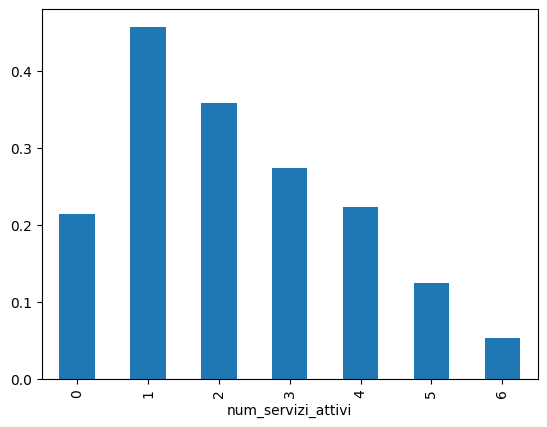

In [46]:
df.groupby('num_servizi_attivi')['Churn'].mean().plot(kind='bar')